<a href="https://colab.research.google.com/github/jairajpal/First-CNN/blob/master/first_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.3.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [6]:
train_images=train_images/255.0
test_images=test_images/255.0

(60000, 28, 28)

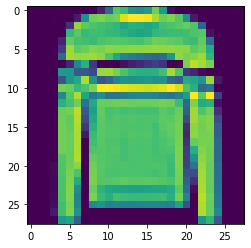

In [7]:
plt.imshow(train_images[5])
train_images.shape

In [8]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [10]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
          filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
          kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
          activation='relu',
          input_shape=(28,28,1)
      ),
    keras.layers.Conv2D(
          filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
          kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
          activation='relu'
    ),  
    keras.layers.Flatten(),
    keras.layers.Dense(
          units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
          activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3   ])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [11]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [16]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=3,directory='output1',project_name="Mnist Fashion")

INFO:tensorflow:Reloading Oracle from existing project output1/Mnist Fashion/oracle.json
INFO:tensorflow:Reloading Tuner from output1/Mnist Fashion/tuner0.json


In [17]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4165 - accuracy: 0.8497 - val_loss: 0.3111 - val_accuracy: 0.8850
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2734 - accuracy: 0.8999 - val_loss: 0.2839 - val_accuracy: 0.8960
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2202 - accuracy: 0.9182 - val_loss: 0.2614 - val_accuracy: 0.9057


Epoch 1/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3999 - accuracy: 0.8556 - val_loss: 0.3145 - val_accuracy: 0.8830
Epoch 2/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2591 - accuracy: 0.9039 - val_loss: 0.2737 - val_accuracy: 0.9060
Epoch 3/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2006 - accuracy: 0.9253 - val_loss: 0.2496 - val_accuracy: 0.9128


INFO:tensorflow:Oracle triggered exit


In [23]:
build_model.summary()

AttributeError: ignored